In [39]:
# DIABETES

In [40]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report,f1_score

import warnings
warnings.filterwarnings('ignore')

In [41]:
data = pd.read_csv('diabetes.csv')

In [42]:
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [43]:
data.shape

(768, 9)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [45]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [46]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

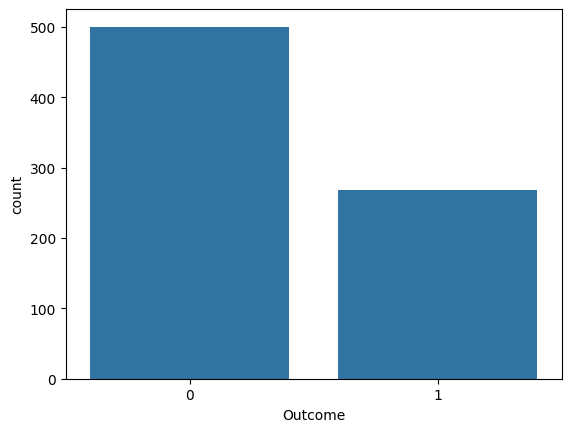

In [47]:
sns.countplot(x = 'Outcome',data = data)

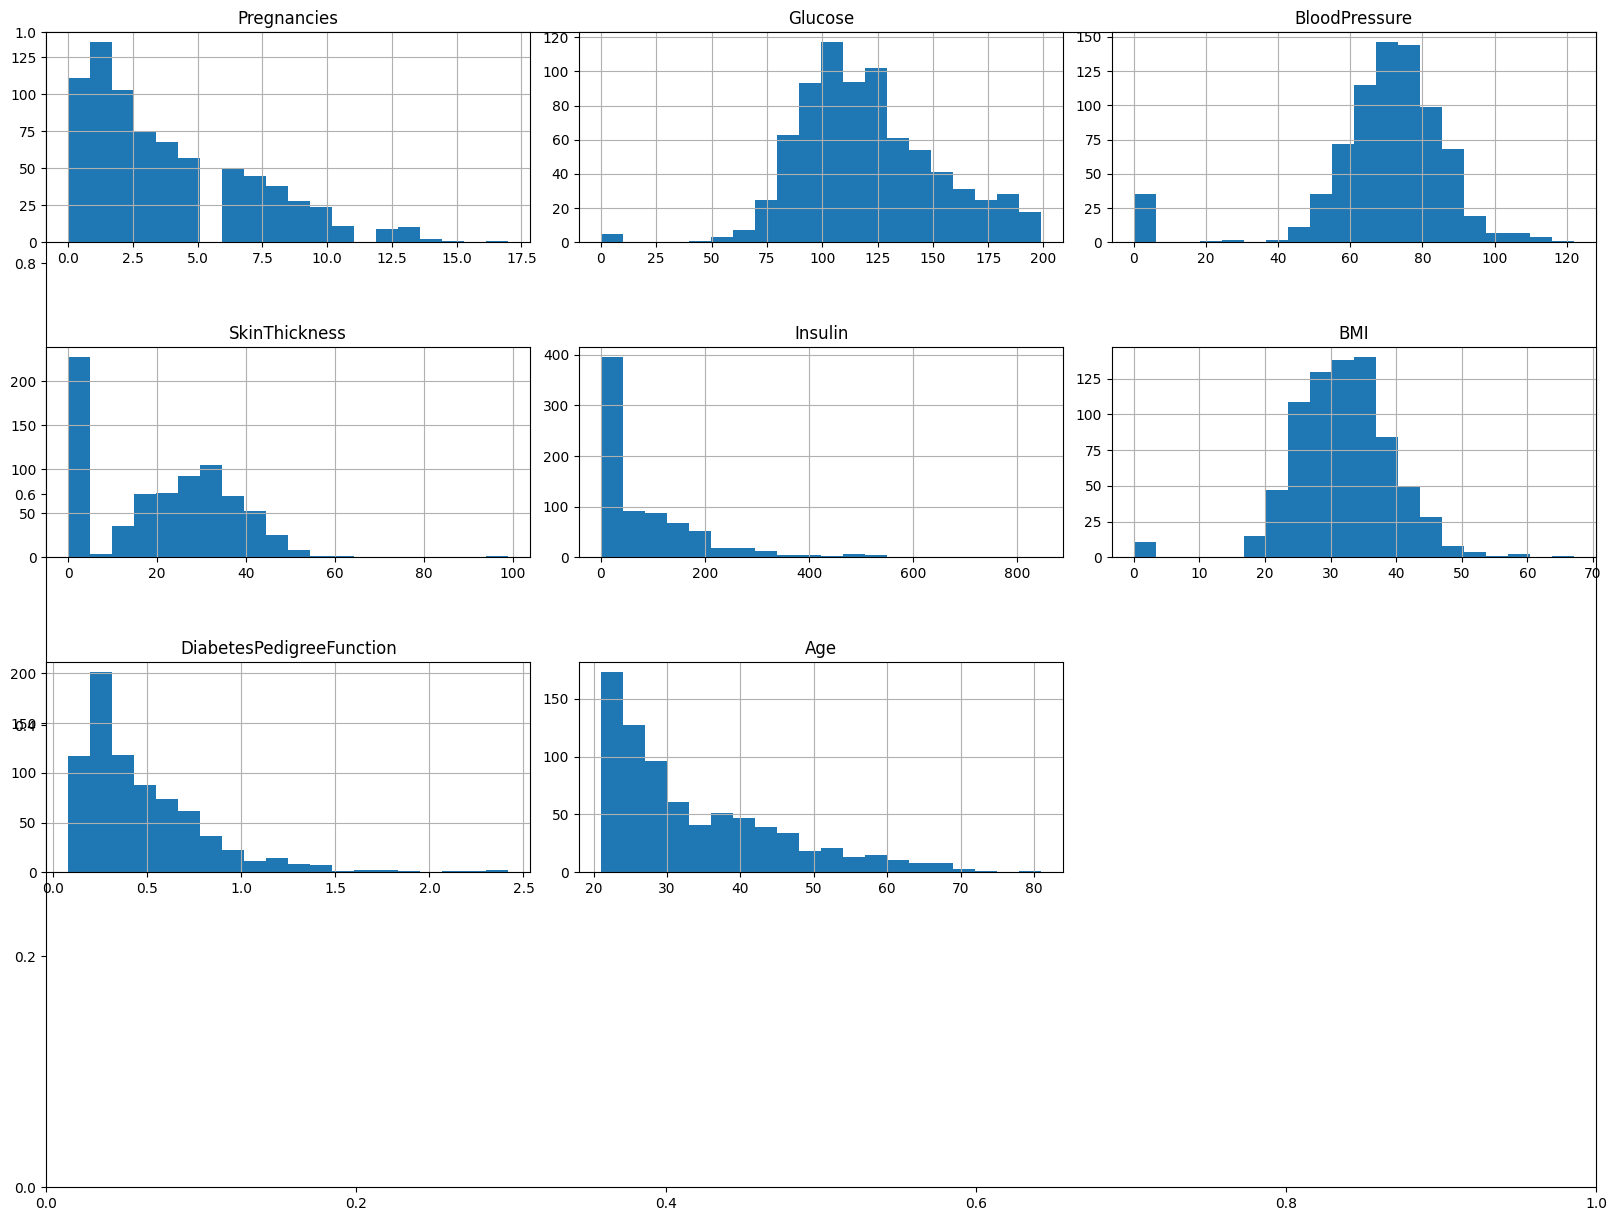

In [48]:
import itertools

col = data.columns[:8]
plt.subplots(figsize = (20, 15))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot((length//2), 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    data[i].hist(bins = 20)
    plt.title(i)
plt.show()

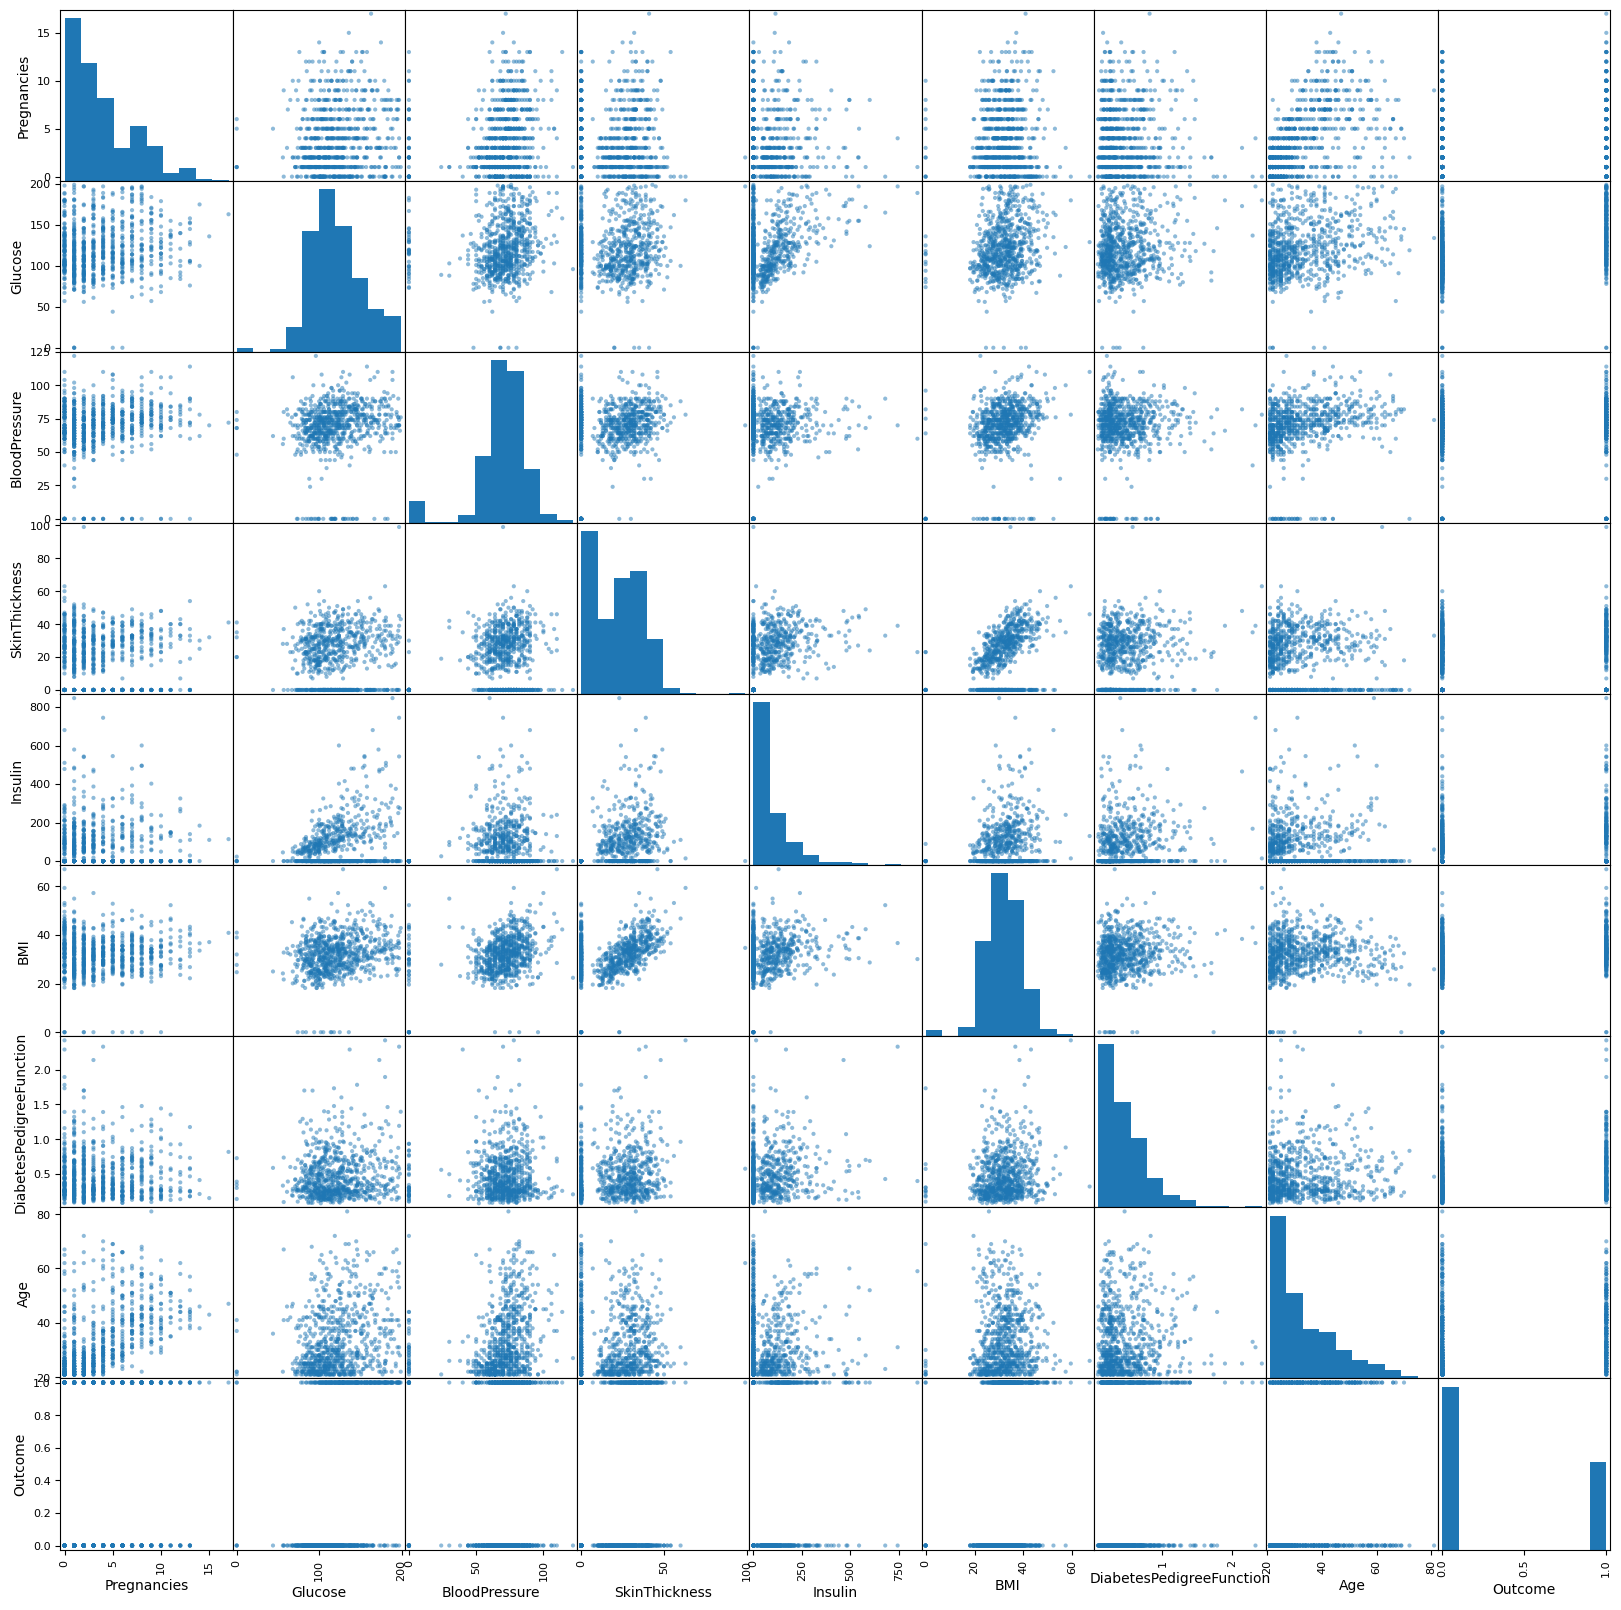

In [49]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, figsize = (20, 20));

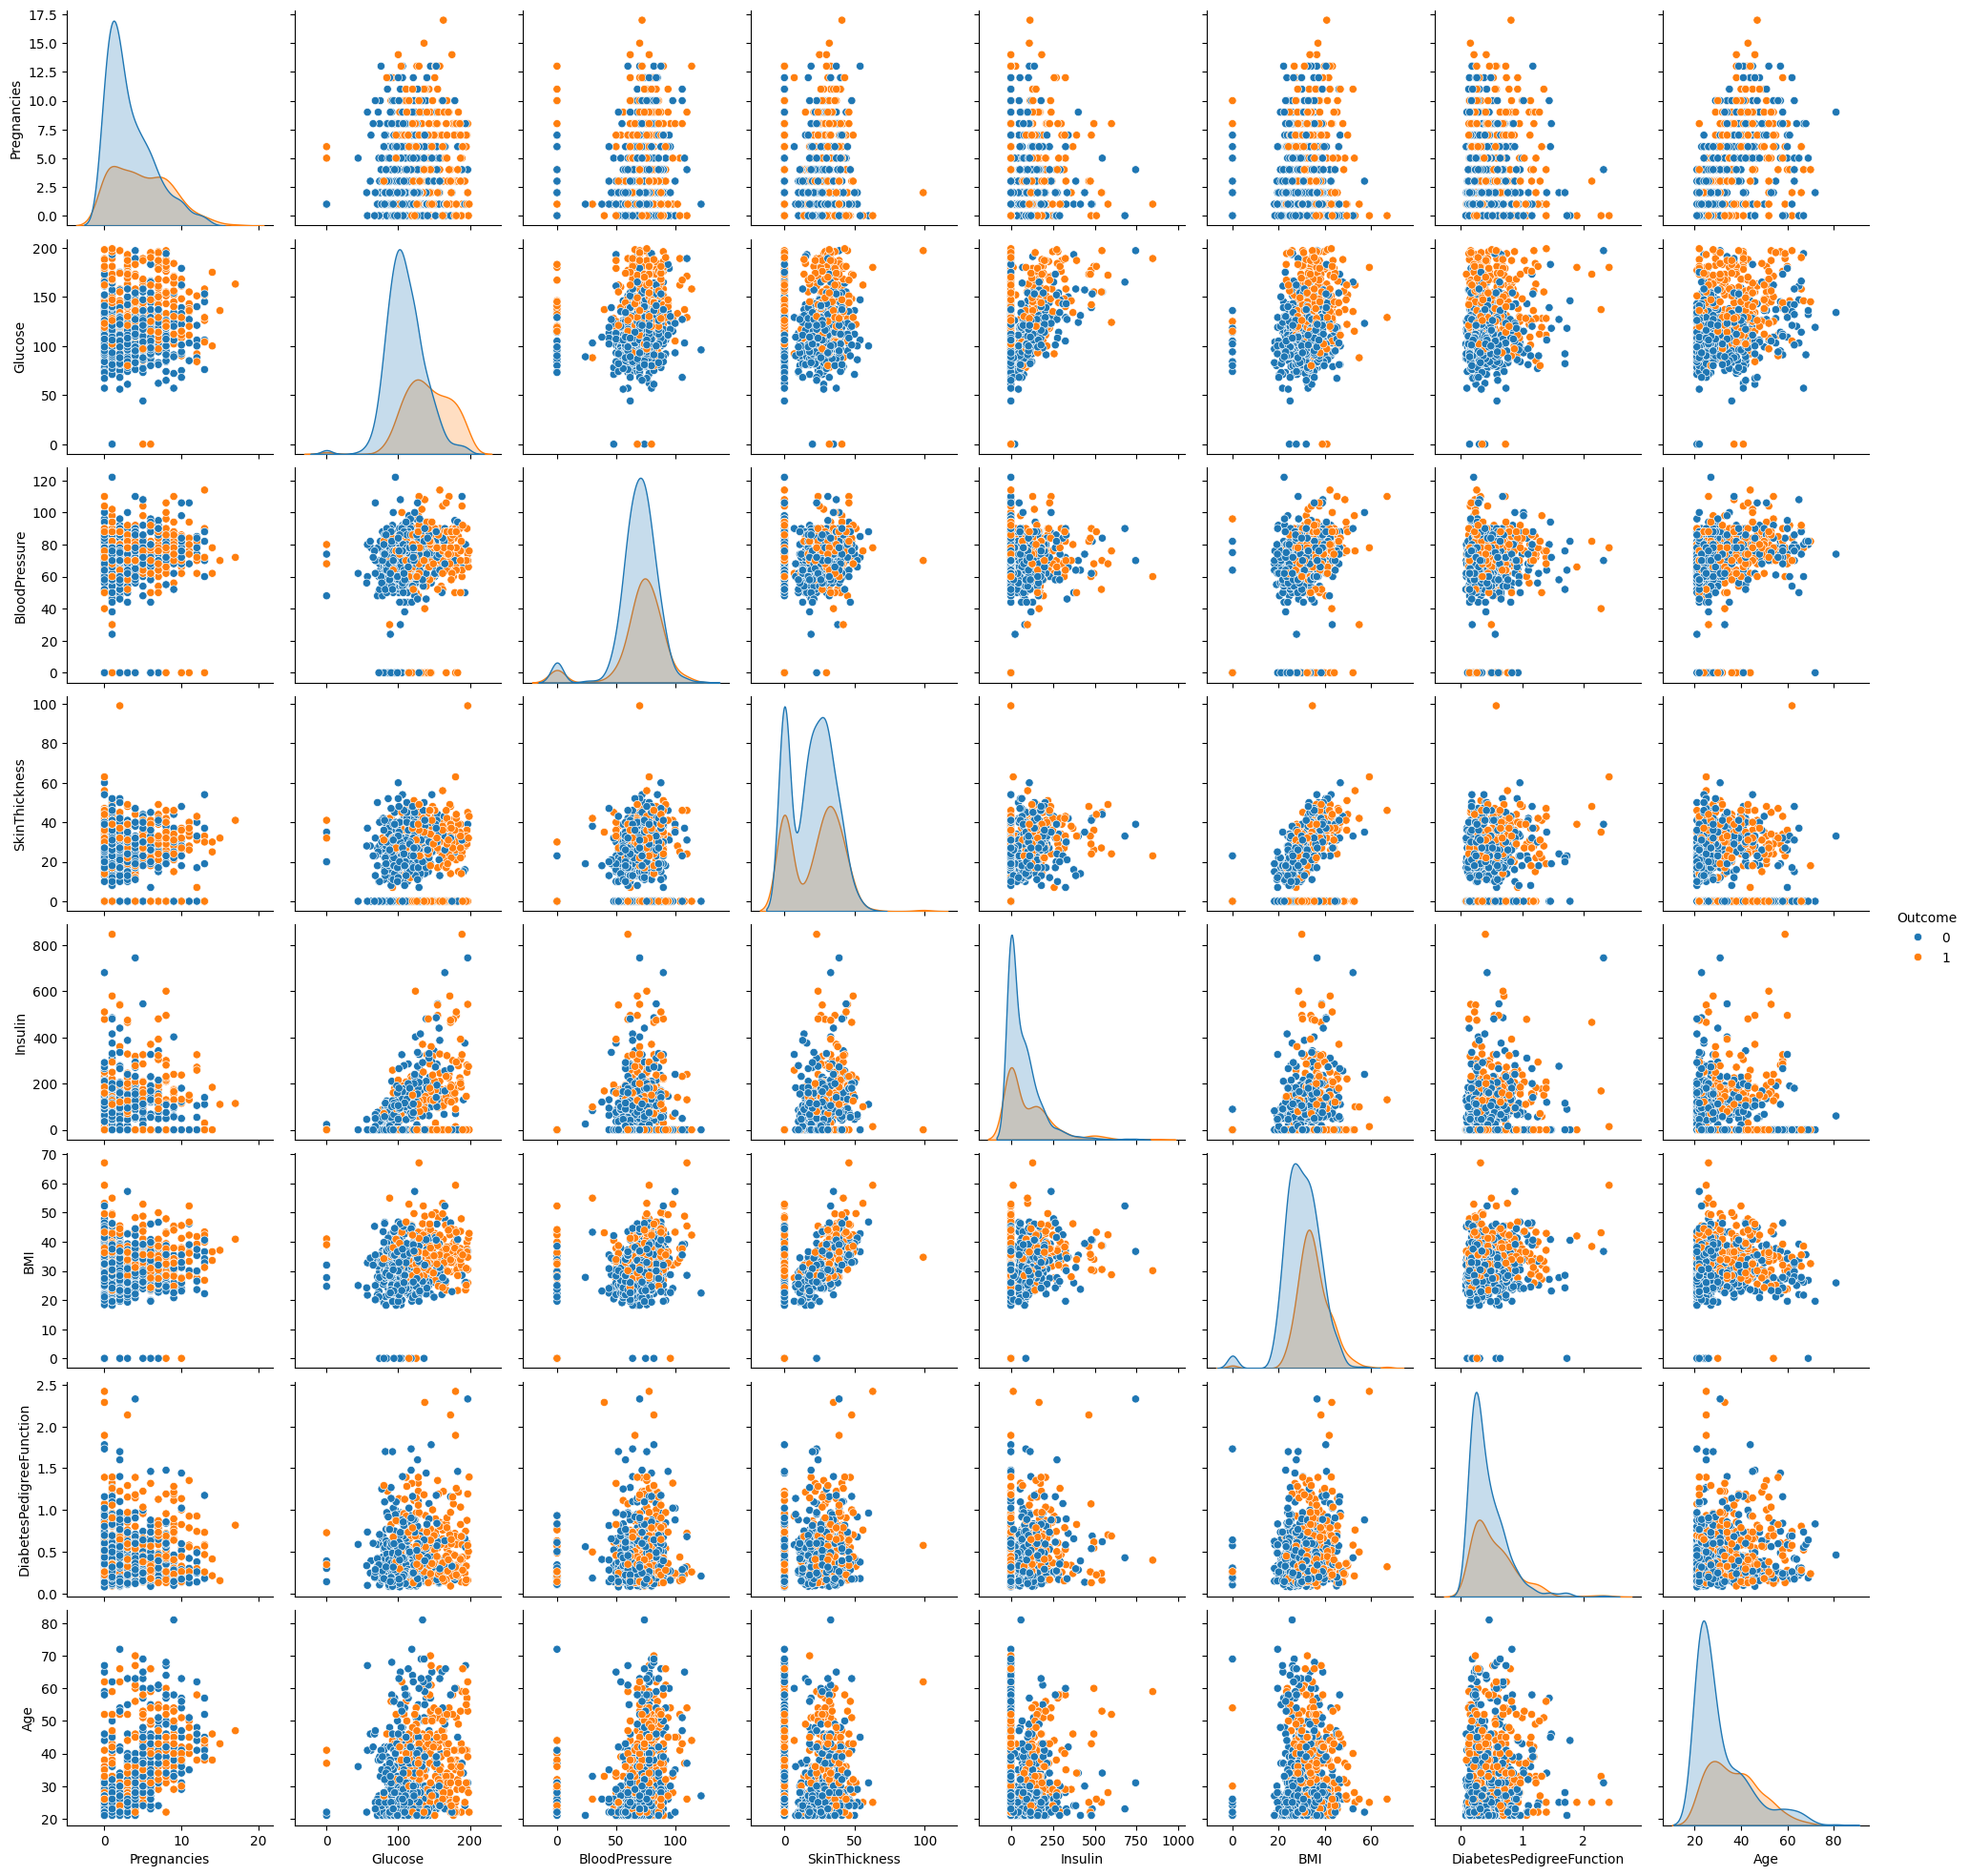

In [50]:
sns.pairplot(data = data, hue = 'Outcome')
plt.show()

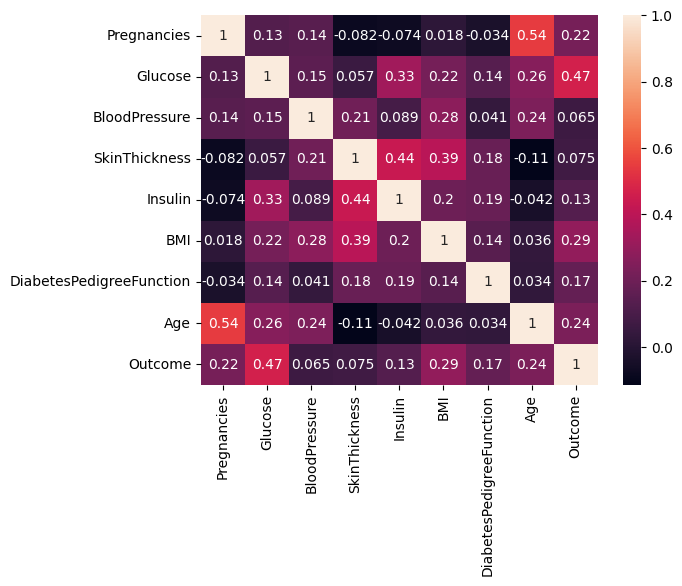

In [51]:
sns.heatmap(data.corr(), annot = True)
plt.show()

In [52]:
dataset_new = data

In [53]:
dataset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = dataset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.nan) 

In [54]:
dataset_new.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [55]:
dataset_new["Glucose"].fillna(dataset_new["Glucose"].mean(), inplace = True)
dataset_new["BloodPressure"].fillna(dataset_new["BloodPressure"].mean(), inplace = True)
dataset_new["SkinThickness"].fillna(dataset_new["SkinThickness"].mean(), inplace = True)
dataset_new["Insulin"].fillna(dataset_new["Insulin"].mean(), inplace = True)
dataset_new["BMI"].fillna(dataset_new["BMI"].mean(), inplace = True)

In [56]:
dataset_new.describe().T

count        mean        std     min        25%  \
Pregnancies               768.0    3.845052   3.369578   0.000    1.00000   
Glucose                   768.0  121.686763  30.435949  44.000   99.75000   
BloodPressure             768.0   72.405184  12.096346  24.000   64.00000   
SkinThickness             768.0   29.153420   8.790942   7.000   25.00000   
Insulin                   768.0  155.548223  85.021108  14.000  121.50000   
BMI                       768.0   32.457464   6.875151  18.200   27.50000   
DiabetesPedigreeFunction  768.0    0.471876   0.331329   0.078    0.24375   
Age                       768.0   33.240885  11.760232  21.000   24.00000   
Outcome                   768.0    0.348958   0.476951   0.000    0.00000   

                                 50%         75%     max  
Pregnancies                 3.000000    6.000000   17.00  
Glucose                   117.000000  140.250000  199.00  
BloodPressure              72.202592   80.000000  122.00  
SkinThickness              29.153420   32.000000   99.00  
Insulin                   155.548223  155.548223  846.00  
BMI                        32.400000   36.600000   67.10  
DiabetesPedigreeFunction    0.372500    0.626250    2.42  
Age                        29.000000   41.000000   81.00  
Outcome                     0.000000    1.000000    1.00

In [57]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dataset_scaled = sc.fit_transform(dataset_new)

In [58]:
dataset_scaled = pd.DataFrame(dataset_scaled)

In [59]:
X = dataset_scaled.iloc[:, [1, 4, 5, 7]].values
Y = dataset_scaled.iloc[:, 8].values

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42, stratify = dataset_new['Outcome'] )

In [61]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (614, 4)
X_test shape: (154, 4)
Y_train shape: (614,)
Y_test shape: (154,)


In [62]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

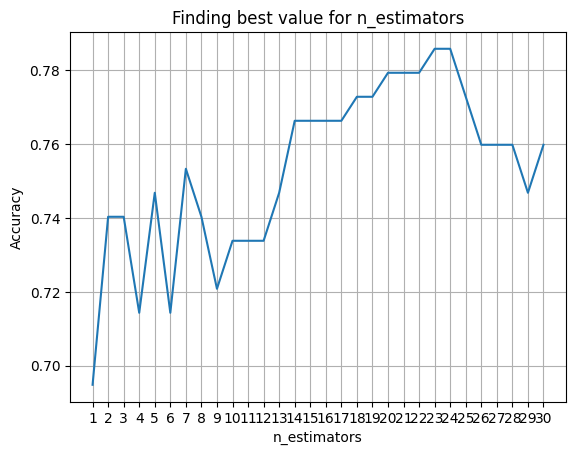

Highest value:  0.7857142857142857


In [63]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

X_axis = list(range(1, 31))
acc = pd.Series(dtype=float)
x = range(1,31)

for i in list(range(1, 31)):
    knn_model = KNeighborsClassifier(n_neighbors = i) 
    knn_model.fit(X_train, Y_train)
    prediction = knn_model.predict(X_test)
    acc = pd.concat([acc, pd.Series(metrics.accuracy_score(prediction, Y_test))], ignore_index=True)
plt.plot(X_axis, acc)
plt.xticks(x)
plt.title("Finding best value for n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
print('Highest value: ',acc.values.max())

In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=24)

In [65]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train, Y_train)

SVC(kernel='linear', random_state=42)

In [66]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [67]:
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [68]:
from sklearn.ensemble import RandomForestClassifier
# Train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [69]:
# Make predictions
Y_pred_logreg = logreg.predict(X_test)
Y_pred_knn = knn.predict(X_test)
Y_pred_svc = svc.predict(X_test)
Y_pred_nb = nb.predict(X_test)
Y_pred_dectree = dectree.predict(X_test)
Y_pred_ranfor = rf_model.predict(X_test)

accuracy_logreg = accuracy_score(Y_test, Y_pred_logreg)
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
accuracy_svc = accuracy_score(Y_test, Y_pred_svc)
accuracy_nb = accuracy_score(Y_test, Y_pred_nb)
accuracy_dectree = accuracy_score(Y_test, Y_pred_dectree)
accuracy_ranfor = accuracy_score(Y_test, Y_pred_ranfor)

print("Logistic Regression: " + str(accuracy_logreg * 100))
print("K Nearest neighbors: " + str(accuracy_knn * 100))
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Naive Bayes: " + str(accuracy_nb * 100))
print("Decision tree: " + str(accuracy_dectree * 100))
print("Random Forest: " + str(accuracy_ranfor * 100))

Logistic Regression: 72.07792207792207
K Nearest neighbors: 78.57142857142857
Support Vector Classifier: 73.37662337662337
Naive Bayes: 71.42857142857143
Decision tree: 68.18181818181817
Random Forest: 72.07792207792207


<h2 style="color:red">Train with 8 features </h2>

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load dataset
X = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
          'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = data['Outcome']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)




RandomForestClassifier(random_state=42)

In [71]:
ranfor = RandomForestClassifier(random_state=42)
logreg = LogisticRegression(random_state = 42)
knn = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)
svc = SVC(kernel = 'linear', random_state = 42)
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
nb = GaussianNB()

logreg.fit(X_train, y_train)
knn.fit(X_train, y_train)
svc.fit(X_train, y_train)
nb.fit(X_train, y_train)
dectree.fit(X_train, y_train)
ranfor.fit(X_train, y_train)

# Make predictions
Y_pred_logreg = logreg.predict(X_test)
Y_pred_knn = knn.predict(X_test)
Y_pred_svc = svc.predict(X_test)
Y_pred_nb = nb.predict(X_test)
Y_pred_dectree = dectree.predict(X_test)
Y_pred_ranfor = ranfor.predict(X_test)

accuracy_logreg = accuracy_score(Y_test, Y_pred_logreg)
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
accuracy_svc = accuracy_score(Y_test, Y_pred_svc)
accuracy_nb = accuracy_score(Y_test, Y_pred_nb)
accuracy_dectree = accuracy_score(Y_test, Y_pred_dectree)


print("Logistic Regression: " + str(accuracy_logreg * 100))
print("K Nearest neighbors: " + str(accuracy_knn * 100))
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Naive Bayes: " + str(accuracy_nb * 100))
print("Decision tree: " + str(accuracy_dectree * 100))


Logistic Regression: 53.896103896103895
K Nearest neighbors: 57.7922077922078
Support Vector Classifier: 53.896103896103895
Naive Bayes: 55.84415584415584
Decision tree: 50.0


In [72]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_knn)
cm

array([[71, 29],
       [36, 18]])

<Axes: >

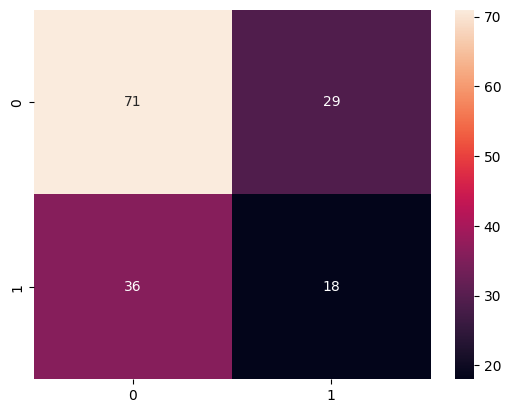

In [73]:
sns.heatmap(pd.DataFrame(cm), annot=True)

In [74]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.66      0.71      0.69       100
         1.0       0.38      0.33      0.36        54

    accuracy                           0.58       154
   macro avg       0.52      0.52      0.52       154
weighted avg       0.57      0.58      0.57       154



<h2 style="color:red"> Stacking </h2>

In [75]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split

# Split the data into features and target

X = dataset_scaled.iloc[:, :-1].values
Y = dataset_scaled.iloc[:, -1].values
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


estimators = [
    ('SVM1', SVC(kernel = 'linear', random_state = 42)),    
    ('SVM2', RandomForestClassifier(random_state=42))  
]

stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=SVC(kernel = 'linear', random_state = 42)
)


stacking_clf.fit(X_train, y_train)
y_pred = stacking_clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100}")

Accuracy: 75.32467532467533


In [76]:
import pickle

# Save the trained model
with open('diabetes.pkl', 'wb') as file:
    pickle.dump(stacking_clf, file)
    
with open('diabetes.pkl', 'rb') as file:
    loaded_model = pickle.load(file)